                                         Product Name  Variance
2                                         KEG STELLA   -2355.09
3                                    KEG RHINO  LAGER  -1444.04
4                                     KEG  SUNSETTER   -1289.45
5                                     KEG FAT TUG IPA   -962.26
6                                          BTL CORONA   -873.72
7                                         BTL KOKANEE   -533.28
8                                KEG P49 TRASH PANDA    -416.76
9                             KEG RHINO HAZY PALE ALE   -379.04
10                              BTL WHISTLER FORAGER    -351.68
11                                 KEG RHINO PALE ALE   -333.24
12                                 CAN LONETREE CIDER   -250.92
13                                         CAN CORONA   -215.86
14                    CAN WHITE CLAW WATERMELON 355ML   -171.44
15                 CAN NUTRL VODKA SODA LEMON SELTZER   -137.82
16   CAN VICE & VIRTUE LOVE POTION RASPB

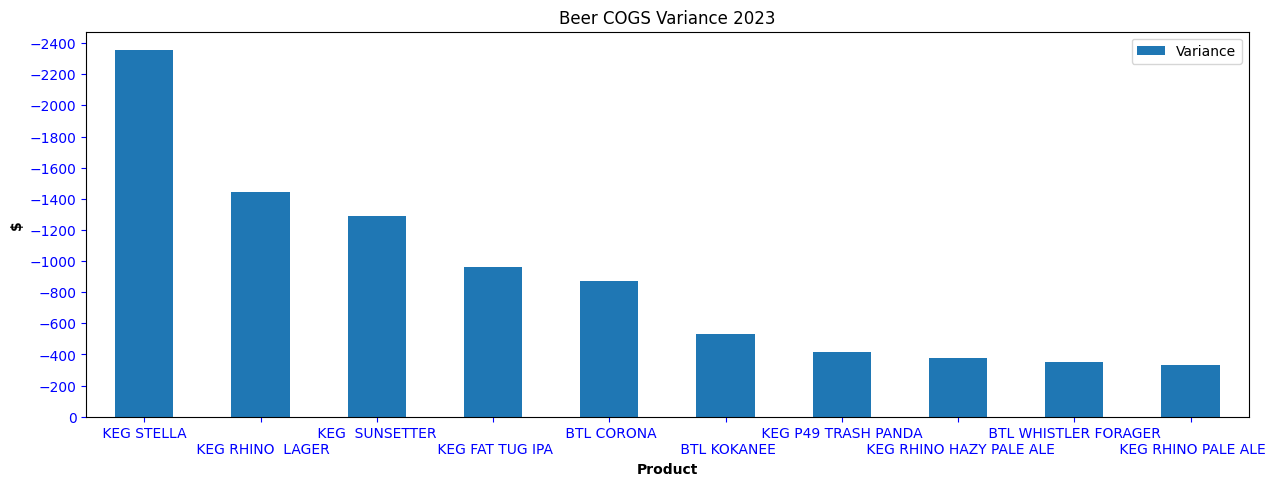

In [3]:
#importing methods that were used
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

#setting display to see entire dataframe
pd.set_option('display.max_rows', None)
#getting the clean document from another file
%run DocumentCleaner.ipynb

#reading the file into a dataframe
BDATA = DocClean("BeerYear2023.csv")

#Cleaning data names to make it easier for Ploting
BDATA['Variance'] = BDATA['Variance'].str.replace(',', '').astype(float)
BDATA['Product Name'] = BDATA["Product Name"].str.replace("BEER", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("PEACH WHEAT ALE", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("STANLEY PARK", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("ARTOIS", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("SIGNATURE", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("DRIFTWOOD ", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("HAZY IPA CRAFT CASHMERE", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("SEASONAL ", '')
BDATA['Product Name'] = BDATA["Product Name"].str.replace("GLUTEN FREE PALE ALE", '')

BDATA = BDATA.groupby(BDATA["Product Name"]).agg({"Variance": 'sum'}).sort_values("Variance").reset_index()

BDATA.drop([0,1], axis = 0, inplace = True)

#using matplotlib to plot the dataframe 
ax = BDATA.head(10).plot.bar(x = "Product Name", y = "Variance", rot = 0, figsize = (15, 5)) #main plot
for tick in ax.xaxis.get_major_ticks()[1::2]: #spacing out the x axis names for better viewing 
    tick.set_pad(15)
ax.set_ylim(ax.get_ylim()[::-1]) #inverting the y axis 


plt.title("Beer COGS Variance 2023")
plt.xlabel('Product',fontweight='bold')
plt.ylabel('$',fontweight='bold')
plt.tick_params(axis = 'x', labelsize = 10, colors = 'blue')
plt.tick_params(axis = 'y', labelsize = 10, colors = 'blue')
plt.locator_params(axis='y', nbins = 20)

print(BDATA)
    